In [1]:
#Importing all the libraries and modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
humidity=pd.read_csv(r'C:\Users\Mayank\Desktop\Mayank\AI Weather and Pollution Prediction Project\Main Datasets\Weather Station\Humidity.csv')

In [3]:
print(humidity.shape)
print(humidity.describe())
print(humidity.head())
print(humidity.columns)

(100990, 9)
                Date          Month           Hour          dewpt  \
count  100990.000000  100990.000000  100990.000000  100369.000000   
mean       15.690049       6.579344      10.928844      15.741205   
std         8.769718       3.475841       6.854328       7.058587   
min         1.000000       1.000000       0.000000     -24.000000   
25%         8.000000       4.000000       5.000000      10.000000   
50%        16.000000       7.000000      11.000000      15.000000   
75%        23.000000      10.000000      17.000000      22.000000   
max        31.000000      12.000000      23.000000      75.000000   

          heatindex       humidity           temp           rain  \
count  29155.000000  100233.000000  100317.000000  100990.000000   
mean      35.651710      57.909481      25.451269       0.026260   
std        5.015384      23.807771       8.482859       0.159908   
min       26.800000       4.000000       1.000000       0.000000   
25%       31.700000      3

In [4]:
#Preprocessing the data
print(humidity.isnull().any())
humidity["dewpt"].fillna(15.741205, inplace = True)
humidity["heatindex"].fillna(35.651710, inplace = True)
humidity["humidity"].fillna(57.909481, inplace = True)
humidity["temp"].fillna(25.451269, inplace = True)
humidity["humidity previous"].fillna(57.910928, inplace = True)
print(humidity.isnull().any())
#All these mean values are obtained after describing the data set

Date                 False
Month                False
Hour                 False
dewpt                 True
heatindex             True
humidity              True
temp                  True
rain                 False
humidity previous     True
dtype: bool
Date                 False
Month                False
Hour                 False
dewpt                False
heatindex            False
humidity             False
temp                 False
rain                 False
humidity previous    False
dtype: bool


In [29]:
humidity.head()

,Date,Month,Hour,dewpt,heatindex,humidity,temp,rain,humidity previous
0,1,11,11,9.0,35.65171,27.0,30.0,0,60.0
1,1,11,12,10.0,35.65171,32.0,28.0,0,60.0
2,1,11,13,11.0,35.65171,44.0,24.0,0,52.0
3,1,11,14,10.0,35.65171,41.0,24.0,0,46.0
4,1,11,16,11.0,35.65171,47.0,23.0,0,39.0


In [5]:
humidity.describe()

,Date,Month,Hour,dewpt,heatindex,humidity,temp,rain,humidity previous
count,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000
mean,15.690049,6.579344,10.928844,15.741205,35.651710,57.909481,25.451269,0.026260,57.910928
std,8.769718,3.475841,6.854328,7.036852,2.694736,23.718373,8.454547,0.159908,23.717129
min,1.000000,1.000000,0.000000,-24.000000,26.800000,4.000000,1.000000,0.000000,4.000000
25%,8.000000,4.000000,5.000000,10.000000,35.651710,39.000000,19.000000,0.000000,39.000000
50%,16.000000,7.000000,11.000000,15.000000,35.651710,58.000000,27.000000,0.000000,58.000000
75%,23.000000,10.000000,17.000000,22.000000,35.651710,77.000000,32.000000,0.000000,77.000000
max,31.000000,12.000000,23.000000,75.000000,73.600000,243.000000,90.000000,1.000000,243.000000


In [6]:
humidity_num=humidity[list(humidity.dtypes[humidity.dtypes!='object'].index)]
humidity_y=humidity_num.pop('humidity')
humidity_x=humidity_num

In [7]:
train_x,test_x,train_y,test_y=train_test_split(humidity_x,humidity_y,test_size=0.2,random_state=4)
train_x.head()

,Date,Month,Hour,dewpt,heatindex,temp,rain,humidity previous
99686,6,1,15,17.0,35.65171,18.0,0,65.0
18305,29,1,10,5.0,35.65171,21.0,0,48.0
91877,20,8,6,25.0,35.65171,32.0,0,59.0
55714,29,2,14,12.0,35.65171,24.0,0,27.0
40664,2,2,7,13.0,35.65171,16.0,0,94.0


In [8]:
#First Model Linear Regression
hmodel = LinearRegression()
hmodel.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(test_x)
prediction=hmodel.predict(test_x)
#Calculating error
np.mean((prediction-test_y)**2)

       Date  Month  Hour  dewpt  heatindex  temp  rain  humidity previous
16733    18     11     8    4.0   35.65171  28.0     0               35.0
82934    21      4    15   14.0   35.65171  30.0     0               46.0
33831    11      4    13    3.0   35.65171  35.0     0               12.0
22660    14     12    19   10.0   35.65171  14.0     0               52.0
47063    16      8    14   26.0   33.60000  28.0     0               71.0
...     ...    ...   ...    ...        ...   ...   ...                ...
26343    24      5     8   16.0   44.40000  43.0     0               50.0
10264    12      9    22   24.0   35.65171  25.0     0               94.0
17753     4      1    15    9.0   35.65171  11.0     0               63.0
98956     2     12    12   17.0   35.65171  22.0     0               54.0
46164    26      7    23   25.0   34.50000  29.0     0               84.0

[20198 rows x 8 columns]


60.23569473803791

In [35]:
pd.DataFrame({'actual':test_y,'prediction':prediction,'diff':(test_y-prediction)})

,actual,prediction,diff
16733,21.0,15.810640,5.189360
82934,27.0,39.800003,-12.800003
33831,13.0,-7.026156,20.026156
22660,77.0,74.042530,2.957470
47063,89.0,79.442568,9.557432
...,...,...,...
26343,21.0,9.668695,11.331305
10264,94.0,83.845528,10.154472
17753,88.0,81.080842,6.919158
98956,73.0,70.514674,2.485326


In [36]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(hmodel, 'HLinearRegression.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#LR = joblib.load('LRTP.pkl')  
  
# Use the loaded model to make predictions 
#LR.predict(X_test)

['HLinearRegression.pkl']

In [ ]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(train_x)
lin2=LinearRegression()
poly.fit(x_poly,train_y)
lin2.fit(x_poly,train_y)

In [ ]:
prediction2 = lin2.predict(poly.fit_transform(test_x))
#Calculating the error
np.mean((prediction2-test_y)**2)

In [ ]:
pd.DataFrame({'actual':test_y,'prediction':prediction2,'diff':(test_y-prediction2)})

In [ ]:
#Saving the Polynomial Regression Model
joblib.dump(lin2, 'HUMPR.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#PR = joblib.load('HUMPR.pkl')  
  
# Use the loaded model to make predictions 
#PR.predict(X_test)

In [37]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [39]:
prediction3=regressor.predict(test_x)
print(np.mean((prediction3-test_y)**2))
dt=np.array([28,6,17,48,51,38,0,50]).reshape(1,-1)
print(regressor.predict(dt))

10.285660084294632
[53.]


In [40]:
test_x.shape

(20198, 8)

In [41]:
test_x.head(3)

,Date,Month,Hour,dewpt,heatindex,temp,rain,humidity previous
16733,18,11,8,4.0,35.65171,28.0,0,35.0
82934,21,4,15,14.0,35.65171,30.0,0,46.0
33831,11,4,13,3.0,35.65171,35.0,0,12.0


In [42]:
#Saving the Decision Tree
joblib.dump(regressor, 'HDecisionTree.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('HUMDT.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['HDecisionTree.pkl']

In [43]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=60,random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [45]:
prediction4=regr.predict(test_x)
np.mean((prediction4-test_y)**2)

5.884006638577993

In [46]:
regr.predict(dt)

array([58.49])

In [47]:
pd.DataFrame({'actual':test_y,'prediction':prediction4,'diff':(test_y-prediction4)})

,actual,prediction,diff
16733,21.0,20.99,0.01
82934,27.0,27.06,-0.06
33831,13.0,12.94,0.06
22660,77.0,76.08,0.92
47063,89.0,89.00,0.00
...,...,...,...
26343,21.0,21.00,0.00
10264,94.0,93.89,0.11
17753,88.0,88.01,-0.01
98956,73.0,68.07,4.93


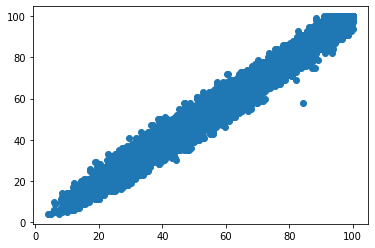

In [48]:
plt.scatter(prediction4,test_y)

In [49]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(regr,'HRandomForest.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#RF = joblib.load('HUMRF.pkl')  
  
# Use the loaded model to make predictions 
#RF.predict(X_test)

['HRandomForest.pkl']